# Задание рубежного контроля и входные данные

## Вариант 4 - задача 1 - набор данных 4.

### Задача 1.

Для заданного набора данных провести корреляционный анализ. В случае наличия пропусков в данных удалить строки или колонки, содержащие пропуски. Сделать выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

### Дополнительное задание.

Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

### Набор данных 4.

Доступен по адресу: https://www.kaggle.com/carlolepelaars/toy-dataset

# Ячейки Jupyter-ноутбука

## Текстовое описание датасета

В качестве набора данных используется датасет с вымышленными данными. Он имеет следующие атрибуты:

- Number - порядковый номер - индекс для каждой строки
- City - город - город проживания человека
- Gender - пол - пол человека
- Age - возраст - сколько человеку лет
- Income - доход - годовой доход человека
- Illness - болезнь - болеет ли человек

## Импорт библиотек и загрузка данных

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим датасет:

In [2]:
data = pd.read_csv('toy_dataset.csv')

Выведем первые 5 строк датасета:

In [3]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


Определим размер датасета:

In [4]:
data.shape

(150000, 6)

Определим типы столбцов:

In [5]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

Часть столбцов имеют тип "Object". Для корреляционного анализа требуется преобразование этих столбцов в числовые типы данных.

Столбец "Number" не нужен для корреляции, поэтому удалим его:

In [6]:
data = data.drop(columns=['Number'], axis=1)

In [7]:
data.head()

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


## Преобразование типов данных

Проверим уникальные значения для столбца "Сity":

In [8]:
data['City'].unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

В качестве значений в столбце "City" могут быть следующие города: "Dallas", "New York City", "Los Angeles", "Mountain View", "Boston", "Washington D.C.", "San Diego" and "Austin". Таких значений 8.

Проверим уникальные значения для столбца "Gender":

In [9]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

В столбце "Gender" 2 варианта - "Male" или "Female".

Проверим уникальные значения для столбца "Illness":

In [10]:
data['Illness'].unique()

array(['No', 'Yes'], dtype=object)

В столбце "Illness" тоже 2 варианта - "No" или "Yes".

Эти три столбца можно отнести к категориальным признакам.

Уникальные значения категориальных признаков можно кодировать целыми числами. Для этого можно использовать LabelEncoder из scikit-learn.

Импортируем LabelEncoder: 

In [11]:
from sklearn.preprocessing import LabelEncoder

Преобразуем столбец "City":

In [12]:
letypecity = LabelEncoder()
learrcity = letypecity.fit_transform(data["City"])
data["City"] = learrcity
data = data.astype({"City":"int64"})

Проверим преобразование:

In [13]:
np.unique(learrcity)

array([0, 1, 2, 3, 4, 5, 6, 7])

Аналогично преобразуем столбцы "Gender" и "Illness":

In [14]:
letypegender = LabelEncoder()
learrgender = letypegender.fit_transform(data["Gender"])
data["Gender"] = learrgender
data = data.astype({"Gender":"int64"})

In [15]:
np.unique(learrgender)

array([0, 1])

In [16]:
letypeill = LabelEncoder()
learrill = letypeill.fit_transform(data["Illness"])
data["Illness"] = learrill
data = data.astype({"Illness":"int64"})

In [17]:
np.unique(learrill)

array([0, 1])

Выведем типы столбцов после преобразования:

In [18]:
data.dtypes

City         int64
Gender       int64
Age          int64
Income     float64
Illness      int64
dtype: object

## Проверка наличия пропусков

Проверим наличие пропусков:

In [19]:
data.isnull().sum()

City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Видим, что пропуски не наблюдаются.

## Корреляционный анализ

Корреляционный анализ помогает найти корреляции с целевом признаком, а также выявить линейно независимые нецелевые признаки:

В качестве целевого признака выберем столбец "Gender" (0 - мужчины, 1 - женщины).

Построим корреляционную матрицу:

In [20]:
data.corr()

,City,Gender,Age,Income,Illness
City,1.000000,0.002188,-0.000636,0.234541,-0.001712
Gender,0.002188,1.000000,-0.003653,0.198888,0.001297
Age,-0.000636,-0.003653,1.000000,-0.001318,0.001811
Income,0.234541,0.198888,-0.001318,1.000000,0.000298
Illness,-0.001712,0.001297,0.001811,0.000298,1.000000


Для визуализации корреляционной матрицы построим тепловую карту:

<AxesSubplot:>

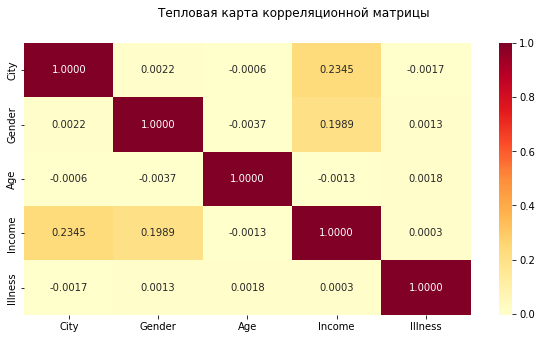

In [21]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Тепловая карта корреляционной матрицы')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.4f', cmap="YlOrRd")

На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно коррелирует с доходом ("Income", 0.20)
- Целевой признак слабо коррелирует c городом ("City", 0.0022), возрастом ("Age", -0.0037) и болезнью ("Illness", 0.0013)
- Наблюдается корреляция города ("City") с доходом ("Income") - 0.23

Сильно корреляции (>0.5) не наблюдается, значит все признаки можно оставить в модели.

## Диаграмма рассеяния

Трансформируем обратно данные для столбцов "City" и "Gender":

In [22]:
cities = {
0: 'Austin',
1: 'Boston',
2: 'Dallas',
3: 'Los Angeles',
4: 'Mountain View',
5: 'New York City',
6: 'San Diego',
7: 'Washington D.C.',
}
data['City'] = data['City'].replace(cities)

genders = {
0: 'Male',
1: 'Female',
}
data['Gender'] = data['Gender'].replace(genders)

In [23]:
data.head()

,City,Gender,Age,Income,Illness
0,Dallas,Female,41,40367.0,0
1,Dallas,Female,54,45084.0,0
2,Dallas,Female,42,52483.0,0
3,Dallas,Female,40,40941.0,0
4,Dallas,Female,46,50289.0,0


Построим диаграмму рассеяния для столбцов "City" и "Income", покрасим относительно "Gender":

<AxesSubplot:xlabel='City', ylabel='Income'>

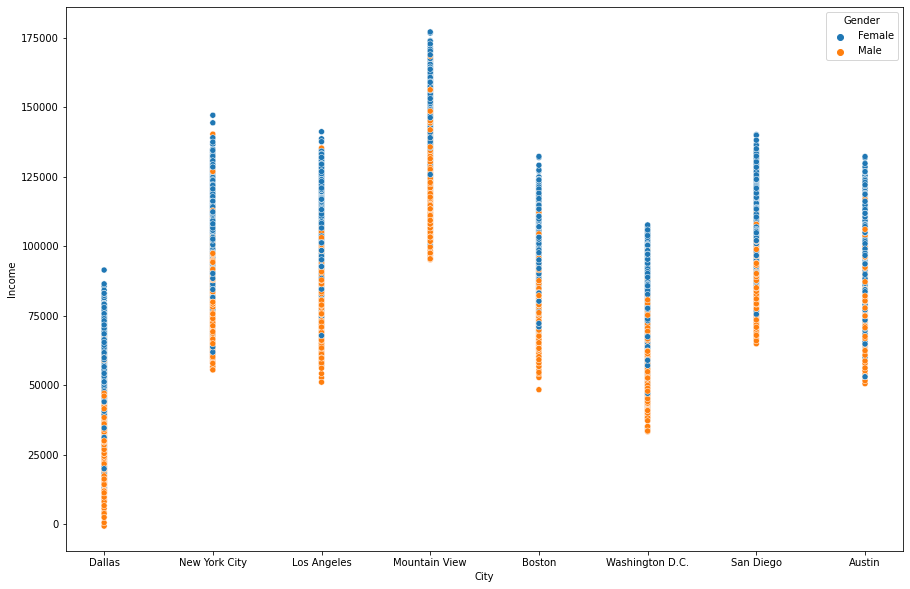

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(ax=ax, x='City', y='Income', hue='Gender', data=data)

Из диаграммы видно следующее:
- Доход женщин выше, чем доход мужчин во всех городах
- Городами с самыми высокими доходами являются Mountain View, New York City и Los Angeles
- Городами с самыми низкими доходами являются Dallas, Washington D.C., Boston